# Plot Colormap using SUM_GIS_LEM
Use example on plotting shapefiles

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import geopandas as gpd


from descartes import PolygonPatch

fp = "/Users/abigailpozulp/Downloads/LME66/LMEs66.shp"

In [11]:
def load_shape_file(fp):
    """Loads the shape file desired to mask a grid.
    Args:
        filepath: Path to *.shp file
    """
    shpfile = gpd.read_file(fp)
    return shpfile

In [13]:
shp = load_shape_file(fp)
shp.head()

,OBJECTID,LME_NUMBER,LME_NAME,GROUPING,ARCTIC,USLMES,Shape_Leng,Shape_Area,SUM_GIS_KM,geometry
0,1,23.0,Baltic Sea,None,None,None,219.326402,61.950021,3.951472e+05,"POLYGON ((10.97943973554271 54.38055038418429,..."
1,2,52.0,Sea of Okhotsk,None,None,None,145.932989,213.796584,1.561297e+06,"POLYGON ((156.7070450503869 51.18857905056069,..."
2,3,22.0,North Sea,None,None,None,209.486403,103.965247,6.938472e+05,"POLYGON ((5.278888225314518 61.98027038609212,..."
3,4,2.0,Gulf of Alaska,None,None,Yes,495.473780,211.045622,1.530668e+06,POLYGON ((-149.4114074707736 61.49637985210421...
4,5,9.0,Labrador - Newfoundland,Arctic,Arctic,None,270.847479,114.597691,9.077923e+05,(POLYGON ((-64.56793350674803 60.4550934642860...


In [14]:
# The data of interest should map to the same indices as your shape files,
# such as LMEs.
total_area = shp['SUM_GIS_KM'].values
total_area

array([ 395147.231641, 1561297.36029 ,  693847.221941, 1530668.23799 ,
        907792.333424,  761666.01308 ,  989593.504638,  534350.190794,
        284848.075049, 2220709.40559 ,  462995.385515,  322287.929835,
       2534882.9853  ,  304640.388455, 1325473.19011 ,  441374.429324,
       1127849.9424  ,  782301.55701 ,  302665.808428,  223206.813436,
       1539637.44459 , 3954204.23353 ,  463248.371592,  984993.895278,
       3281451.46235 , 3190677.27158 , 3687541.96822 , 1994795.15076 ,
       1020133.47108 ,  382535.900494, 1060899.37411 , 1931667.6492  ,
        845831.337911, 2281063.39607 , 1081537.30884 , 2564782.29597 ,
       1465862.02868 ,  784714.193098, 1287337.31105 , 2638828.61546 ,
        917126.173398,  655617.797171,  569252.645171,  969787.835109,
       1170585.89422 , 1194982.39763 , 4343692.17964 , 1018722.21746 ,
        582439.973015,  104259.560367,  482227.428725, 1197020.03587 ,
       1057334.98236 , 1982526.63114 ,  989312.022604,  868966.113589,
      

In [20]:
def make_colormap(data, cmap_name, norm='linear'):
    """
    Make colormap for mapping shapefiles to.
    
    data: an array of data that the colormap will map to.
    cmap_name: a type of colormap, the default is cmap
    norm: defaults to 'linear'. Pass 'log' for logarithmic colorbar.
    """
    #get the named colormap
    cmap = matplotlib.cm.get_cmap(cmap_name)
    
    #get the colormap to treat min as a color, and max as a different color
    if norm == 'linear':
        norm = matplotlib.colors.Normalize(min(data), max(data))
    elif norm == 'log':
        norm = matplotlib.colors.LogNorm(min(data), max(data))
    else:
        raise ValueError("Supply 'linear' or 'log' for norm.")
    sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm._A = [] # some weird bug to make sure we can plot our colorbar later.
    return sm

what the elif statement does is 

In [21]:
import matplotlib
import cartopy.crs as ccrs
import geoplot.crs as gcrs

ModuleNotFoundError: No module named 'geoplot'

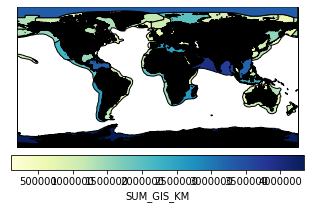

In [23]:
f, axes = plt.subplots(figsize=(8,3),
                       subplot_kw=dict(projection=ccrs.PlateCarree()))

# Learning how to iterate cleanly is a good skill in python.
#
sm = make_colormap(total_area, 'YlGnBu')
#loops through all the LME names 
for i, LME in enumerate(shp['LME_NAME'].values):
    poly = select_shape(shp, 'LME_NAME', LME)
    color = sm.to_rgba(total_area[i])
    test = axes.add_patch(PolygonPatch(poly, fc=color, zorder=4))
axes.axis('scaled')

#color land in black
axes.add_feature(cfeature.LAND, color='k')

# add colorbar.
# reference: https://stackoverflow.com/questions/35873209/matplotlib-add-colorbar-to-cartopy-image
cb = plt.colorbar(sm, orientation='horizontal', pad=0.05, fraction=0.09)
cb.set_label('SUM_GIS_KM')

# Get the Colorbar to be based on LME_NUMBER

In [24]:
Number = shp['LME_NUMBER'].values
Number

array([23., 52., 22.,  2.,  9., 24., 50., 51.,  8.,  3., 62.,  7., 26.,
       25., 49., 48., 27., 47.,  6.,  4.,  5., 32., 33., 10., 12., 36.,
       34., 11., 37., 35., 17., 28., 31., 38., 16., 13., 29., 39., 40.,
       30., 45., 41., 15., 46., 14., 42., 61., 43., 44., 60., 59., 19.,
       21., 20., 58., 57., 56., 53., 65.,  1., 18., 63., 55., 66., 64.,
       54.])

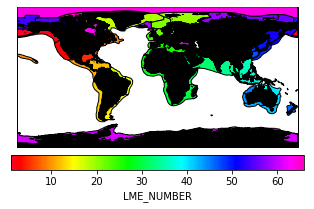

In [30]:
f, axes = plt.subplots(figsize=(8,3),
                       subplot_kw=dict(projection=ccrs.PlateCarree()))

# Learning how to iterate cleanly is a good skill in python.
#
sm = make_colormap(Number, 'gist_rainbow')
#loops through all the LME names 
for i, LME in enumerate(shp['LME_NAME'].values):
    poly = select_shape(shp, 'LME_NAME', LME)
    color = sm.to_rgba(Number[i])
    test = axes.add_patch(PolygonPatch(poly, fc=color, zorder=4))
axes.axis('scaled')

#color land in black
axes.add_feature(cfeature.LAND, color='k')

# add colorbar.
# reference: https://stackoverflow.com/questions/35873209/matplotlib-add-colorbar-to-cartopy-image
cb = plt.colorbar(sm, orientation='horizontal', pad=0.05, fraction=0.09)
cb.set_label('LME_NUMBER')